In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
# violations csv with website name and number of violations
df = pd.read_csv("./sign_up_violations.csv")
df['tranco_rank'] = ""
t_df = pd.read_csv("./tranco_W8P49.csv")

In [17]:
t_df['domain']

tranco_rank_dict = t_df.set_index('domain')['rank']
def get_tranco_rank(row):
    if row["Website"] in tranco_rank_dict:
        return tranco_rank_dict[row["Website"]]
    else:
        return None

df["tranco_rank"] = df.apply(get_tranco_rank, axis=1)
df.dropna(subset=['tranco_rank'])

,Website,Number of Violations,tranco_rank
1,100000jobs.ch,4,2338998.0
2,100hires.com,2,935835.0
3,100thieves.com,9,343876.0
5,111skin.com,7,409507.0
7,11bravos.com,6,1533377.0
...,...,...,...
10139,zuluandzephyr.com,5,941399.0
10140,zunior.com,11,2057587.0
10141,zuppler.com,3,184123.0
10142,zurchers.com,5,699795.0


In [18]:
# sort values
df = df.sort_values(by=['tranco_rank'])
df.to_csv('tranco_rank_of_signups.csv', encoding='utf-8', index=False)

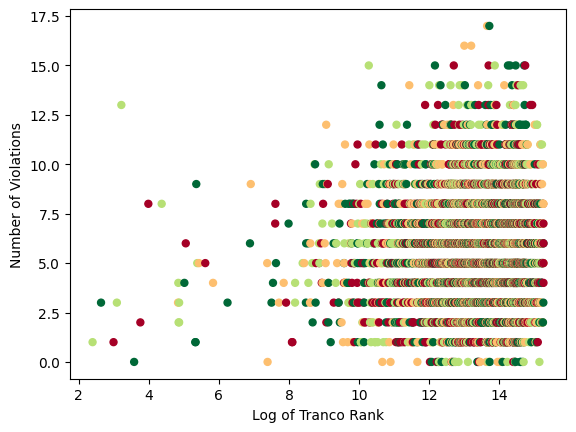

In [22]:

x = np.log(df["tranco_rank"])
y = df["Number of Violations"]
np.random.seed(42)
c = np.random.randint(1,5,size=len(x))
norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=25, cmap=cmap, norm=norm)
ax.set_ylabel("Number of Violations")
ax.set_xlabel("Log of Tranco Rank")
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)


plt.savefig('tranco_rank.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [24]:
# this will be multipled by 2 so beware
sample_size = 150

# Calculate median of log
median_log_rank = np.nanmedian(np.log(df["tranco_rank"]))
left_data = df["tranco_rank"][df["tranco_rank"] <= np.exp(median_log_rank)]
right_data = df["tranco_rank"][df["tranco_rank"] > np.exp(median_log_rank)]

# Sample data and violations
left_sample = np.random.choice(left_data, size=sample_size, replace=False)
right_sample = np.random.choice(right_data, size=sample_size, replace=False)
sampled_data = np.concatenate((left_sample, right_sample))
sampled_violations = df.loc[df["tranco_rank"].isin(sampled_data), ["tranco_rank", "Website", "Number of Violations"]]


print(sampled_violations)
sampled_violations.to_csv('sampled_violations.csv', encoding='utf-8')

      tranco_rank              Website  Number of Violations
9808         43.0        wordpress.org                     2
1960        212.0  creativecommons.org                     9
8592       2060.0              tawk.to                     5
7724       5193.0          shop-pro.jp                     4
2664       7104.0          elo7.com.br                     5
...           ...                  ...                   ...
9977    3504584.0        xlplugins.com                     6
815     3722945.0      barprephero.com                     8
5619    3769748.0   mirafiorioutlet.it                     3
7965    3787361.0      skaterhq.com.au                     9
2077    3911475.0       dagimarket.com                    11

[306 rows x 3 columns]


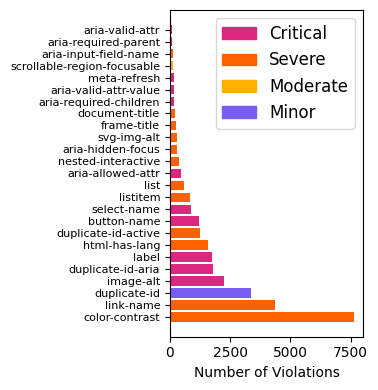

In [21]:
main_data = pd.read_csv("./violations_checker.csv")
main_data = main_data.sort_values('Count', ascending=False)


colors_map = {
    "critical": "#DC267F",
    "serious": "#FE6100",
    "moderate": "#FFB000",
    "minor": "#785EF0" }

plt.figure(figsize=(4,4))

filtered_data = main_data[main_data["Count"] > 100]
plt.barh(filtered_data["Violation ID"], filtered_data["Count"], color=filtered_data['Severity'].map(colors_map))


patches = [ plt.Rectangle((0, 0), 1, 1, color=c) for c in ["#DC267F", "#FE6100", "#FFB000", "#785EF0"]]
plt.legend(patches, ["Critical", "Severe", "Moderate", "Minor"], title="", fontsize=12)

plt.xlabel('Number of Violations')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('violations.pdf', format="pdf", bbox_inches="tight" )
plt.show()